In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio

In [3]:
pd.set_option('display.max_rows', 6)
pd.set_option('display.float_format', '{:.3f}'.format)

In [2]:
world = gpd.read_file('data/world.gpkg')
src_elev = rasterio.open('output/elev.tif')
src_grain = rasterio.open('output/grain.tif')
src_multi_rast = rasterio.open('data/landsat.tif')

In [4]:
world

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...,...,...,...,...,...,...,...,...,...
174,XK,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000,71.098,8698.292,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,SS,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000,55.817,1935.879,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [5]:
world.iloc[0:3,:]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000,69.960,8222.254,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000,64.163,2402.099,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN,NaN,NaN,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."


In [7]:
world[['name_long', 'geometry']]

,name_long,geometry
0,Fiji,"MULTIPOLYGON (((-180 -16.55522, -179.91737 -16..."
1,Tanzania,"MULTIPOLYGON (((33.90371 -0.95, 31.86617 -1.02..."
2,Western Sahara,"MULTIPOLYGON (((-8.66559 27.65643, -8.81783 27..."
...,...,...
174,Kosovo,"MULTIPOLYGON (((20.59025 41.85541, 20.71731 41..."
175,Trinidad and Tobago,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."
176,South Sudan,"MULTIPOLYGON (((30.83385 3.50917, 31.24556 3.7..."


In [10]:
world.loc[:, 'name_long':'pop']

,name_long,continent,region_un,subregion,type,area_km2,pop
0,Fiji,Oceania,Oceania,Melanesia,Sovereign country,19289.971,885806.000
1,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,932745.792,52234869.000
2,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,96270.601,NaN
...,...,...,...,...,...,...,...
174,Kosovo,Europe,Europe,Southern Europe,Sovereign country,11230.262,1821800.000
175,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000
176,South Sudan,Africa,Africa,Eastern Africa,Sovereign country,624909.099,11530971.000


In [11]:
world[['name_long', 'pop']].rename(columns={'pop': 'population'})

,name_long,population
0,Fiji,885806.000
1,Tanzania,52234869.000
2,Western Sahara,NaN
...,...,...
174,Kosovo,1821800.000
175,Trinidad and Tobago,1354493.000
176,South Sudan,11530971.000


In [15]:
idx_small = world['area_km2'] < 10000
idx_small

0      False
1      False
2      False
       ...  
174    False
175     True
176    False
Name: area_km2, Length: 177, dtype: bool

In [16]:
small_countries = world[idx_small]
small_countries

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
45,PR,Puerto Rico,North America,Americas,Caribbean,Dependency,9224.663,3534874.000,79.390,35066.046,"MULTIPOLYGON (((-66.28243 18.51476, -67.10068 ..."
79,PS,Palestine,Asia,Asia,Western Asia,Disputed,5037.104,4294682.000,73.126,4319.528,"MULTIPOLYGON (((35.39756 31.48909, 35.54525 31..."
89,VU,Vanuatu,Oceania,Oceania,Melanesia,Sovereign country,7490.040,258850.000,71.709,2892.342,"MULTIPOLYGON (((166.79316 -15.66881, 167.00121..."
...,...,...,...,...,...,...,...,...,...,...,...
160,None,Northern Cyprus,Asia,Asia,Western Asia,Sovereign country,3786.365,NaN,NaN,NaN,"MULTIPOLYGON (((32.73178 35.14003, 32.91957 35..."
161,CY,Cyprus,Asia,Asia,Western Asia,Sovereign country,6207.006,1152309.000,80.173,29786.366,"MULTIPOLYGON (((32.73178 35.14003, 32.25667 35..."
175,TT,Trinidad and Tobago,North America,Americas,Caribbean,Sovereign country,7737.810,1354493.000,70.426,31181.821,"MULTIPOLYGON (((-61.68 10.76, -61.66 10.365, -..."


In [21]:
world.loc[(world['area_km2']<10000)&(world['continent']=='Asia')]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
79,PS,Palestine,Asia,Asia,Western Asia,Disputed,5037.104,4294682.000,73.126,4319.528,"MULTIPOLYGON (((35.39756 31.48909, 35.54525 31..."
160,None,Northern Cyprus,Asia,Asia,Western Asia,Sovereign country,3786.365,NaN,NaN,NaN,"MULTIPOLYGON (((32.73178 35.14003, 32.91957 35..."
161,CY,Cyprus,Asia,Asia,Western Asia,Sovereign country,6207.006,1152309.000,80.173,29786.366,"MULTIPOLYGON (((32.73178 35.14003, 32.25667 35..."


In [22]:
world[world['continent'] == 'Asia'] \
    .loc[:, ['name_long', 'continent']] \
    .iloc[0:5, :]

,name_long,continent
5,Kazakhstan,Asia
6,Uzbekistan,Asia
8,Indonesia,Asia
24,Timor-Leste,Asia
76,Israel,Asia


In [23]:
world[
    (world['continent'] == "North America") |
    (world['continent'] == 'South America')
] \
.loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
...,...,...
47,Cuba,North America
156,Paraguay,South America
175,Trinidad and Tobago,North America


In [24]:
world[world['continent'].isin(['North America', 'South America'])] \
    .loc[:, ['name_long', 'continent']]

,name_long,continent
3,Canada,North America
4,United States,North America
9,Argentina,South America
...,...,...
47,Cuba,North America
156,Paraguay,South America
175,Trinidad and Tobago,North America


In [25]:
world_agg1 = world.groupby('continent')[['pop']].sum().reset_index()
world_agg1

,continent,pop
0,Africa,1154946633.000
1,Antarctica,0.000
2,Asia,4311408059.000
...,...,...
5,Oceania,37757833.000
6,Seven seas (open ocean),0.000
7,South America,412060811.000


In [26]:
world_agg2 = world[['continent', 'pop', 'geometry']] \
    .dissolve(by='continent', aggfunc='sum') \
    .reset_index()
world_agg2

,continent,geometry,pop
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",1154946633.000
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",0.000
2,Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",4311408059.000
...,...,...,...
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",37757833.000
6,Seven seas (open ocean),"POLYGON ((68.935 -48.625, 68.8675 -48.83, 68.7...",0.000
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",412060811.000


<Axes: >

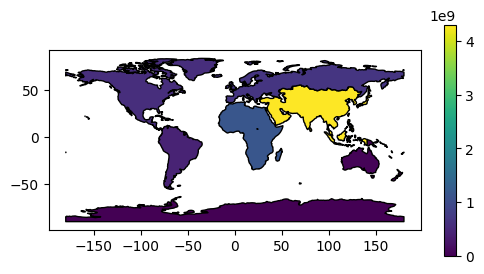

In [27]:
fig, ax = plt.subplots(figsize=(6,3))
world_agg2.plot(column='pop', edgecolor='black', legend=True, ax=ax)

In [28]:
world_agg3 = world.dissolve(
    by='continent', 
    aggfunc={
        'name_long': 'count',
        'pop': 'sum',
        'area_km2': 'sum'
    }).rename(columns={'name_long': 'n'}).reset_index()
world_agg3

,continent,geometry,n,pop,area_km2
0,Africa,"MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...",51,1154946633.000,29946197.811
1,Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",1,0.000,12335956.076
2,Asia,"MULTIPOLYGON (((48.67923 14.0032, 48.23895 13....",47,4311408059.000,31252459.388
...,...,...,...,...,...
5,Oceania,"MULTIPOLYGON (((147.91405 -43.21152, 147.56456...",7,37757833.000,8504488.657
6,Seven seas (open ocean),"POLYGON ((68.935 -48.625, 68.8675 -48.83, 68.7...",1,0.000,11602.572
7,South America,"MULTIPOLYGON (((-68.63999 -55.58002, -69.2321 ...",13,412060811.000,17762592.171
